In [1]:
include("../src/GaPSE.jl");

In [2]:
using DelimitedFiles, Plots, Dierckx, QuadGK, SpecialFunctions
using LaTeXStrings, LsqFit

In [3]:
FILE_F_MAP = "../test/datatest/F_REFERENCE.txt"
FILE_PS = "../test/datatest/file_pk.txt"
FILE_BACKGROUND = "../test/datatest/WideA_ZA_background.dat"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true, s_lim=1.0)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP; expand=false)

GaPSE.parameters_used(stdout, cosmo)

I take the input power spectrum as it is,without expanding.
# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "../test/datatest/file_pk.txt"
# F window function input file : "../test/datatest/F_REFERENCE.txt"
# CLASS Background input file: "../test/datatest/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.1920520376943 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.374716165819 Mpc/h_0
# 	 comoving z_eff = 0.15045636332693793 
# 	 Volume of the survey V_survey = 3.845366096394393e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830221
# 	 σ_3 = 3735.1227501923527
# 


In [4]:
NAMES_BACKGROUND = ["z", "proper time [Gyr]", "conf. time [Mpc]", "H [1/Mpc]",
     "comov. dist.", "ang.diam.dist.", "lum. dist.", "comov.snd.hrz.",
     "(.)rho_g", "(.)rho_b", "(.)rho_cdm", "(.)rho_lambda", "(.)rho_ur",
     "(.)rho_crit", "gr.fac. D", "gr.fac. f"]

BD = GaPSE.BackgroundData(FILE_BACKGROUND, 0.2);

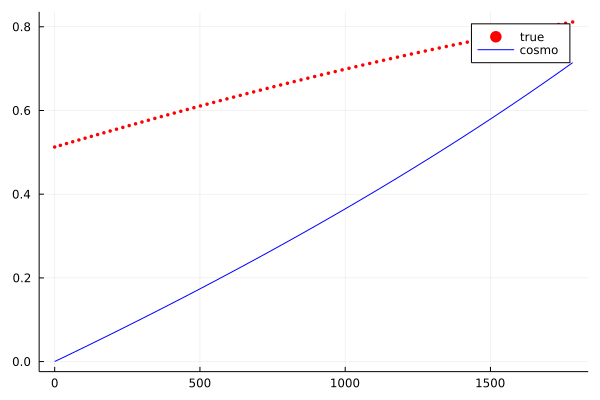

In [10]:
xs = BD.comdist
c_xs = BD.comdist

ys = BD.f
c_ys = cosmo.z_of_s.(xs)

scatter(xs, ys, ms=2, mc=:red, markerstrokewidth=0.0, label="true")
plot!(c_xs, c_ys, ms=2, lc=:blue, label="cosmo")

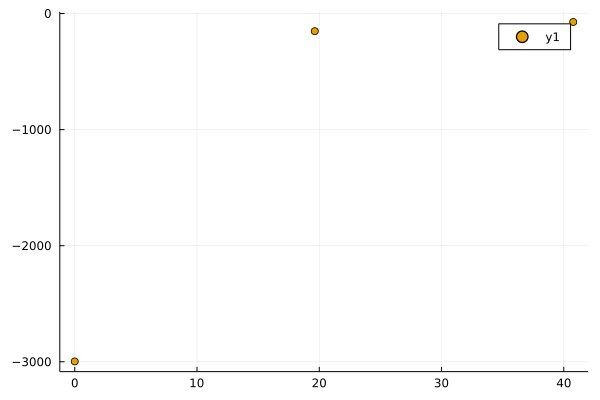

In [6]:
xs = BD.comdist[BD.comdist.<50]
ys = cosmo.ℛ_of_s.(xs)

scatter(xs, ys)

In [7]:
ℋ0 = GaPSE.ℋ0
function func_ℛ(s, ℋ; s_lim=10.0)
     if s > s_lim
          return 1.0 - 1.0/(s*ℋ)
     else
          return 1.0 - 1.0/(s_lim*ℋ0)
     end
end

func_ℛ (generic function with 1 method)

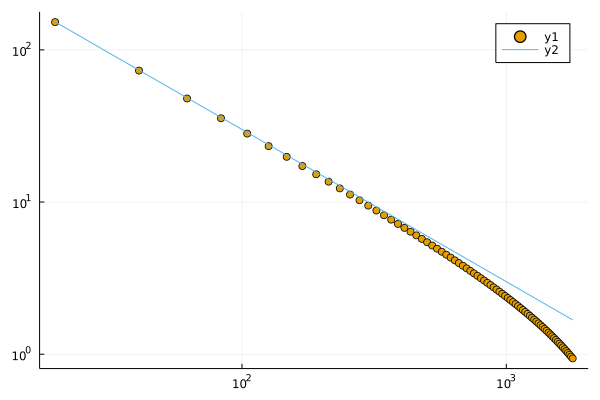

In [8]:
xs = BD.comdist[begin+1:end]
ys = [func_ℛ(s, ℋ; s_lim=1.0) for (s,ℋ) in zip(BD.comdist[begin+1:end], BD.ℋ[begin+1:end])]

scatter(xs, -ys, xaxis=:log, yaxis=:log)
plot!(xs, [1/(ℋ0*s) for s in xs])

In [9]:
xs

77-element Vector{Float64}:
   19.634035861439997
   40.774637652938
   61.994508593793995
   83.29292995072
  104.6691649423
  126.12245883194998
  147.65203903268
  169.2571152265
  190.93687949574
  212.69050646823
  234.51715347585
  256.41596072631
  278.38605148773996
    ⋮
 1516.845886038
 1541.0199972236999
 1565.2011420241001
 1589.388094602
 1613.5796357141999
 1637.7745531007
 1661.9716418627
 1686.169704835
 1710.3675529451
 1734.5640055638999
 1758.7578908458997
 1782.9480460575